In [40]:
import numpy as np 
import pandas as pd

In [41]:
df = pd.read_csv('gold_price_data.csv')

In [47]:
df.head(15)

,Date,SPX,GLD,USO,SLV,EUR/USD,year,month,day
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692,2008,1,2
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491,2008,1,3
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492,2008,1,4
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299,2008,1,7
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099,2008,1,8
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405,2008,1,9
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100,2008,1,10
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006,2008,1,11
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900,2008,1,14
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210,2008,1,15


In [63]:
df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD,year,month,day
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789,2018,5,8
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722,2018,5,9
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753,2018,5,10
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118,2018,5,14
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033,2018,5,16


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [45]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

<AxesSubplot:xlabel='year', ylabel='GLD'>

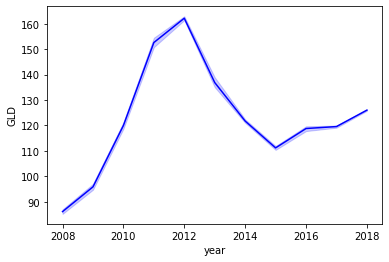

In [51]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
import seaborn as sns
sns.lineplot(x='year',y='GLD',data=df,color='blue')

Text(0.5, 1.05, 'Correlation of df Features')

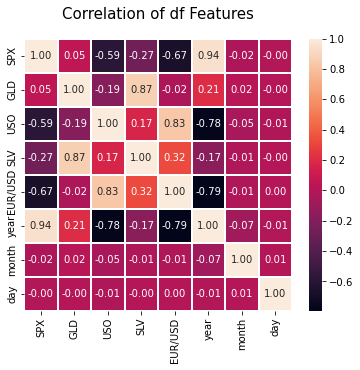

In [52]:
#Now see the correlation matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)

In [53]:
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
year       0.206654
SPX        0.049345
month      0.020494
day       -0.000198
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


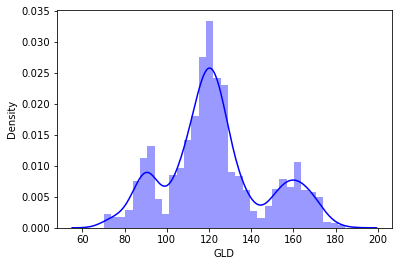

In [54]:
#Lets Check our target variable
sns.distplot(df['GLD'], color = 'blue')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

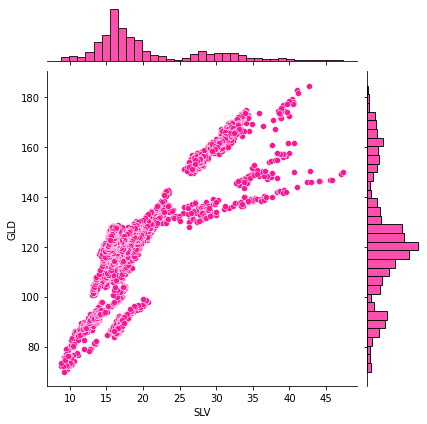

In [55]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'deeppink')

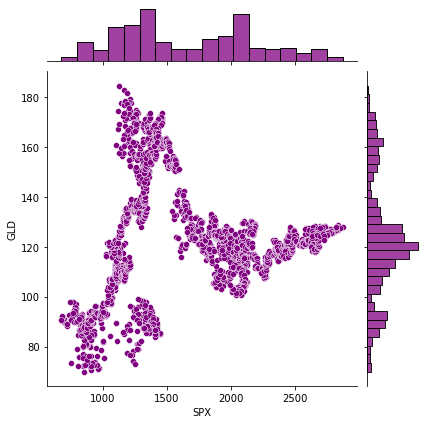

In [56]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'purple')

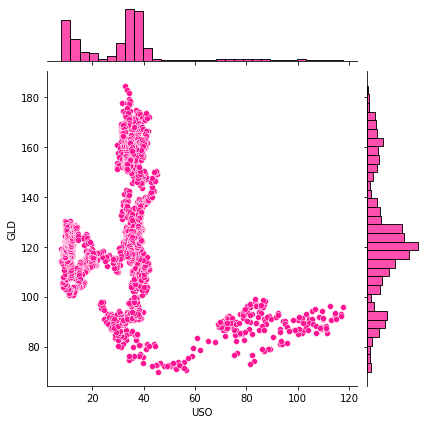

In [57]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['USO'], y = df['GLD'], color = 'deeppink')

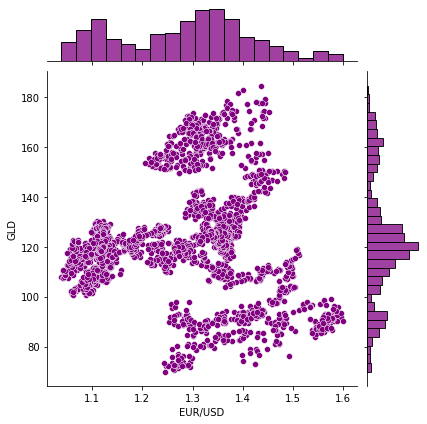

In [58]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['EUR/USD'], y = df['GLD'], color = 'purple')

In [69]:
X=df.iloc[:,7:9].values
Y=df.iloc[:,2].values

In [70]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import fbeta_score, make_scorer

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

In [104]:
def plot_learning_curve(clf, title):
    train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                            X, 
                                                            Y, 
                                                            cv=10, 
                                                            n_jobs=-1, 
                                                            train_sizes=np.linspace(.1, 1., 10), 
                                                            verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")

    # Plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,  alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.legend(loc="best")

In [105]:
dsr = DecisionTreeRegressor(random_state = 0, min_samples_split = 10,  max_depth = 10)

scores = cross_val_score(dsr, X, Y, cv = 10)
"""display(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))"""

'display(scores)\nprint("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))'

In [106]:
rfr = RandomForestRegressor(n_estimators = 10)

scores = cross_val_score(rfr, X, Y, cv = 10)
display(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

array([-35.41247777,  -8.60487192,  -1.338909  ,  -9.33708805,
       -53.06840988,  -2.10912594,  -2.66447631,  -5.03574669,
        -5.60732041, -14.46853258])

Accuracy: -13.76 (+/- 32.35)


In [107]:
dsr.fit(X, Y)
pre_y_by_dsr = dsr.predict(X)

rfr.fit(X, Y)
pre_y_by_rfr = rfr.predict(X)

In [108]:
df = pd.DataFrame(index=df.index)

df['pred_by_decision_tree_regressor'] = pre_y_by_dsr
df['pred_by_random_forest_regressor'] = pre_y_by_rfr
df['actual'] = Y
df.head()

,pred_by_decision_tree_regressor,pred_by_random_forest_regressor,actual
0,115.248334,117.406857,84.860001
1,127.895714,130.714546,85.570000
2,123.255001,124.169722,85.129997
3,114.093749,113.133630,84.769997
4,113.527500,112.942084,86.779999


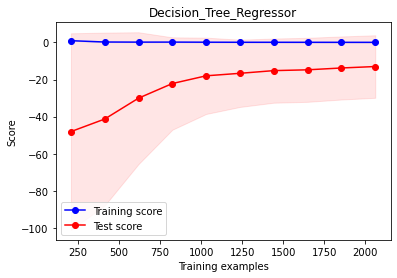

In [109]:
plot_learning_curve(dsr, "Decision_Tree_Regressor")

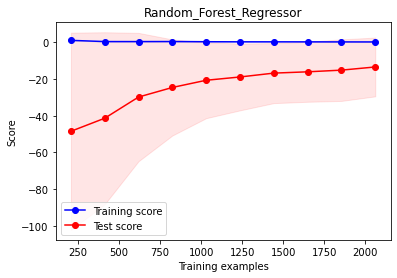

In [110]:
plot_learning_curve(rfr, "Random_Forest_Regressor")

In [118]:
d1=dsr.predict([[2022,1]])
d2=dsr.predict([[2022,3]])
print(d1*0.65)
print(d2*0.65)

[77.18993807]
[77.54778683]


In [119]:
d1=rfr.predict([[2020,6]])
d2=rfr.predict([[2021,6]])
print(d1*0.65)
print(d2*0.65)

[88.39731117]
[88.39731117]
